### Detecting Fake News with Natural Language Processing (NLP)

In this project, we build a Fake News Classifier using Natural Language Processing (NLP) and Machine Learning techniques. The primary objective is to detect misleading or false news content by analyzing the textual information of news articles. The dataset is preprocessed using text cleaning techniques like tokenization, stopword removal, and lemmatization. Feature extraction is performed using TF-IDF and word embeddings, followed by the application of various classification algorithms such as Logistic Regression, Support Vector Machine (SVM), and Random Forest. Evaluation metrics like accuracy, precision, recall, and F1-score are used to assess model performance. This project demonstrates the role of AI in combating misinformation and promoting reliable information sources.

#### Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('WELFake_Dataset.csv',index_col= 0)

#### Preprocessing

In [3]:
data.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
# Dataset contains three columns: Title (about the text news heading); Text (about the news content); and Label (0 = fake and 1 = real).

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


In [6]:
data=data.dropna(subset='text')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72095 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71537 non-null  object
 1   text    72095 non-null  object
 2   label   72095 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


In [8]:
data['label'] = data['label'].map({0: 'Fake News', 1: 'Factual News'})
data.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,Factual News
1,NaN,Did they post their votes for Hillary already?,Factual News
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",Factual News
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,Fake News
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",Factual News


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72095 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71537 non-null  object
 1   text    72095 non-null  object
 2   label   72095 non-null  object
dtypes: object(3)
memory usage: 2.2+ MB


In [10]:
data = data.head(1600)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 0 to 1599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1582 non-null   object
 1   text    1600 non-null   object
 2   label   1600 non-null   object
dtypes: object(3)
memory usage: 50.0+ KB


In [12]:
# set plot options
plt.rcParams['figure.figsize'] = (12, 8)
default_plot_colour = "#00bfbf"

In [13]:
data['label'].value_counts()

label
Factual News    848
Fake News       752
Name: count, dtype: int64

Text(0.5, 0, 'Classification')

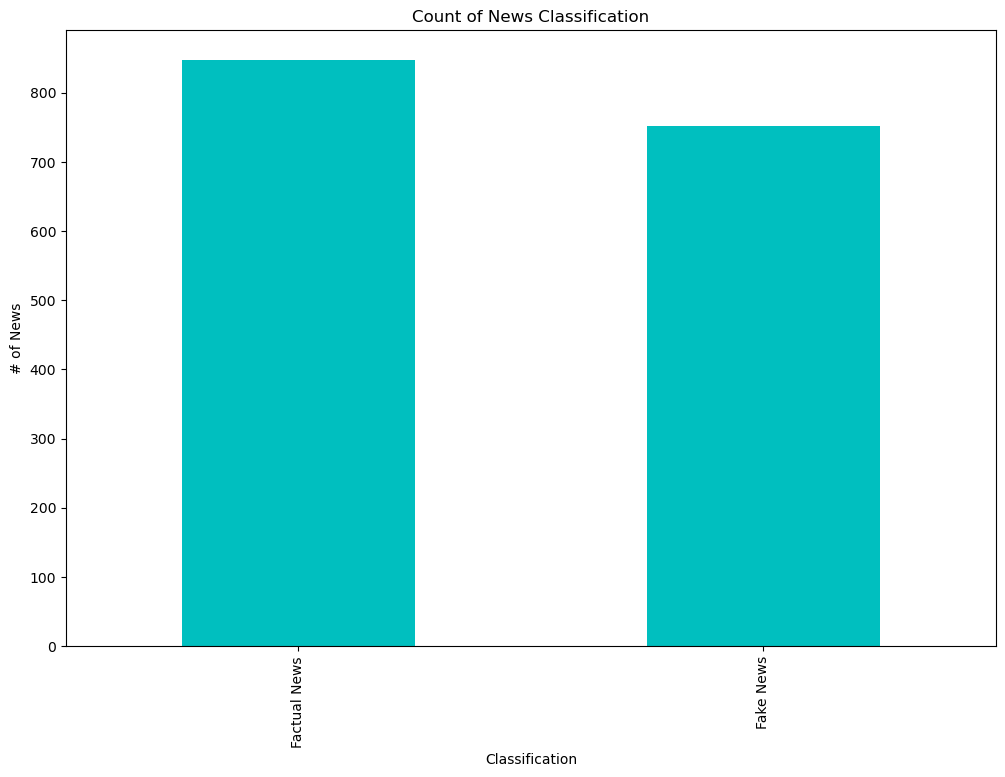

In [14]:
# plotting the values
data['label'].value_counts().plot(kind='bar',color=default_plot_colour)
plt.title('Count of News Classification')
plt.ylabel('# of News')
plt.xlabel('Classification')

#### Import packages required for processing and analysis

In [15]:
import seaborn as sns
import spacy
from spacy import displacy
from spacy import tokenizer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import gensim
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LsiModel, TfidfModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

#### POS Tagging

Part-of-Speech (POS) tagging is the process of marking up a word in a text as corresponding to a particular part of speech, based on both its definition and its context. In simpler terms, it's the process of identifying whether a word is a noun, verb, adjective, adverb, pronoun, etc.

In [16]:
# Loads a small, pre-trained English language model from the spaCy library and assigns it to the variable nlp.
nlp = spacy.load('en_core_web_sm')

In [17]:
# split data by fake and factual news
fake_news = data[data['label'] == 'Fake News']
fact_news = data[data['label'] == 'Factual News']

In [18]:
fake_news.head()

,title,text,label
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,Fake News
11,"May Brexit offer would hurt, cost EU citizens ...",BRUSSELS (Reuters) - British Prime Minister Th...,Fake News
12,Schumer calls on Trump to appoint official to ...,"WASHINGTON (Reuters) - Charles Schumer, the to...",Fake News
14,No Change Expected for ESPN Political Agenda D...,As more and more sports fans turn off ESPN to ...,Fake News
15,Billionaire Odebrecht in Brazil scandal releas...,RIO DE JANEIRO/SAO PAULO (Reuters) - Billionai...,Fake News


In [19]:
fact_news.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,Factual News
1,NaN,Did they post their votes for Hillary already?,Factual News
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",Factual News
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",Factual News
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,Factual News


In [20]:
# create spacey documents - use pipe for dataframe
fake_spaceydocs = list(nlp.pipe(fake_news['text']))
fact_spaceydocs = list(nlp.pipe(fact_news['text']))

nlp.pipe() is used to efficiently process all fake and factual news articles, converting them into spaCy Doc objects for further analysis.

In [21]:
# create function to extract tags for each document in our data
def extract_token_tags(doc:spacy.tokens.doc.Doc):
    return [(i.text,i.ent_type_,i.pos_) for i in doc]

This function extracts the token text, named entity tag (NER), and part-of-speech tag (POS) from each token in a spaCy document.

In [22]:
# tag fake dataset 
fake_tagsdf = []
columns = ['token','ner_tag','pos_tag']

for ix,doc in enumerate(fake_spaceydocs):
    tags = extract_token_tags(doc)
    tags = pd.DataFrame(tags)
    tags.columns = columns
    fake_tagsdf.append(tags)

fake_tagsdf=pd.concat(fake_tagsdf)

# tag factual dataset
fact_tagsdf = []
for ix,doc in enumerate(fact_spaceydocs):
    tags = extract_token_tags(doc)
    tags = pd.DataFrame(tags)
    tags.columns = columns
    fact_tagsdf.append(tags)

fact_tagsdf = pd.concat(fact_tagsdf)

Loop through each fake and factual news Doc, extract the tags using the function, convert the result into a DataFrame, and combine all rows into one DataFrame fake_tagsdf and fact_tagsdf.

In [23]:
fake_tagsdf.head()

,token,ner_tag,pos_tag
0,A,CARDINAL,DET
1,dozen,CARDINAL,NOUN
2,politically,,ADV
3,active,,ADJ
4,pastors,,NOUN


In [24]:
fact_tagsdf.head()

,token,ner_tag,pos_tag
0,No,,DET
1,comment,,NOUN
2,is,,AUX
3,expected,,VERB
4,from,,ADP


In [25]:
# token frequency count (fake)
pos_counts_fake = fake_tagsdf.groupby(['token','pos_tag']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
pos_counts_fake

,token,pos_tag,counts
77,",",PUNCT,24946
28538,the,DET,22948
92,.,PUNCT,18888
22609,of,ADP,11052
11117,a,DET,10574
...,...,...,...
12864,blather,NOUN,1
12859,blast,VERB,1
12855,blaring,NOUN,1
12854,blares,NOUN,1


In [26]:
# token frequency count (fact)
pos_counts_fact = fact_tagsdf.groupby(['token','pos_tag']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
pos_counts_fact

,token,pos_tag,counts
35147,the,DET,22956
82,",",PUNCT,21856
106,.,PUNCT,19136
28388,of,ADP,11763
15308,and,CCONJ,10634
...,...,...,...
15631,arson,NOUN,1
15630,arsenals,NOUN,1
15628,arrows,NOUN,1
15627,arrow,NOUN,1


In [27]:
# frequencies of pos tags
pos_counts_fake.groupby(['pos_tag'])['token'].count().sort_values(ascending=False).head(10)

pos_tag
NOUN     9651
PROPN    8343
VERB     6491
ADJ      3538
ADV      1041
NUM       859
ADP       135
PRON      133
AUX        98
SCONJ      68
Name: token, dtype: int64

In [28]:
# frequencies of pos tags
pos_counts_fact.groupby(['pos_tag'])['token'].count().sort_values(ascending=False).head(10)

pos_tag
NOUN     11913
PROPN    11302
VERB      7457
ADJ       4173
ADV       1265
NUM       1160
X          199
PRON       198
ADP        195
AUX        147
Name: token, dtype: int64

In [29]:
pos_counts_fake[pos_counts_fake.pos_tag == 'NOUN'][:15]

,token,pos_tag,counts
23359,people,NOUN,822
30530,year,NOUN,684
18674,government,NOUN,660
27516,state,NOUN,515
13453,campaign,NOUN,508
30538,years,NOUN,481
28696,time,NOUN,479
24073,president,NOUN,455
14954,country,NOUN,432
23368,percent,NOUN,418


In [30]:
pos_counts_fake[pos_counts_fake.pos_tag == 'ADJ'][:15]

,token,pos_tag,counts
21965,more,ADJ,638
22853,other,ADJ,596
20688,last,ADJ,549
22311,new,ADJ,516
21399,many,ADJ,421
17891,first,ADJ,419
23776,political,ADJ,370
18175,former,ADJ,369
8609,Republican,ADJ,350
24075,presidential,ADJ,325


In [31]:
pos_counts_fact[pos_counts_fact.pos_tag == 'NOUN'][:15]

,token,pos_tag,counts
29237,people,NOUN,1193
35335,time,NOUN,643
23357,government,NOUN,508
37481,years,NOUN,505
37335,world,NOUN,452
37474,year,NOUN,423
18938,country,NOUN,406
36961,way,NOUN,394
27098,media,NOUN,388
21027,election,NOUN,386


In [32]:
pos_counts_fact[pos_counts_fact.pos_tag == 'ADJ'][:15]

,token,pos_tag,counts
28657,other,ADJ,603
27637,more,ADJ,588
26915,many,ADJ,484
28032,new,ADJ,432
83,-,ADJ,401
2334,American,ADJ,371
29858,political,ADJ,330
28847,own,ADJ,317
26045,last,ADJ,300
22407,first,ADJ,285


#### Named Entities

Named Entities in Natural Language Processing (NLP) are real-world objects, concepts, or things that can be identified by a proper name. The task of identifying and classifying these entities within unstructured text is called Named Entity Recognition (NER), also known as entity chunking, entity extraction, or entity identification.

In [33]:
top_entities_fake = fake_tagsdf[fake_tagsdf['ner_tag']!= ''].groupby(['token','ner_tag']).size().reset_index(name='counts').sort_values(by='counts',ascending=False)
top_entities_fake.head()

,token,ner_tag,counts
11847,the,ORG,1535
10227,Trump,ORG,1319
10228,Trump,PERSON,918
10320,U.S.,GPE,716
3165,Clinton,PERSON,645


In [34]:
top_entities_fact = fact_tagsdf[fact_tagsdf['ner_tag']!= ''].groupby(['token','ner_tag']).size().reset_index(name='counts').sort_values(by='counts',ascending=False)
top_entities_fact.head()

,token,ner_tag,counts
11096,Trump,ORG,1506
13187,the,ORG,1269
3522,Clinton,PERSON,865
11097,Trump,PERSON,688
5821,Hillary,PERSON,591


In [35]:
top_entities_fake['ner_tag'].unique()

array(['ORG', 'PERSON', 'GPE', 'DATE', 'NORP', 'ORDINAL', 'CARDINAL',
       'PERCENT', 'MONEY', 'LOC', 'TIME', 'FAC', 'PRODUCT', 'LAW',
       'WORK_OF_ART', 'EVENT', 'QUANTITY', 'LANGUAGE'], dtype=object)

In [36]:
top_entities_fact['ner_tag'].unique()

array(['ORG', 'PERSON', 'DATE', 'CARDINAL', 'NORP', 'GPE', 'ORDINAL',
       'MONEY', 'PERCENT', 'LOC', 'FAC', 'TIME', 'PRODUCT', 'WORK_OF_ART',
       'EVENT', 'LAW', 'QUANTITY', 'LANGUAGE'], dtype=object)

[Text(0.5, 1.0, 'Most Common Entities in Fake News')]

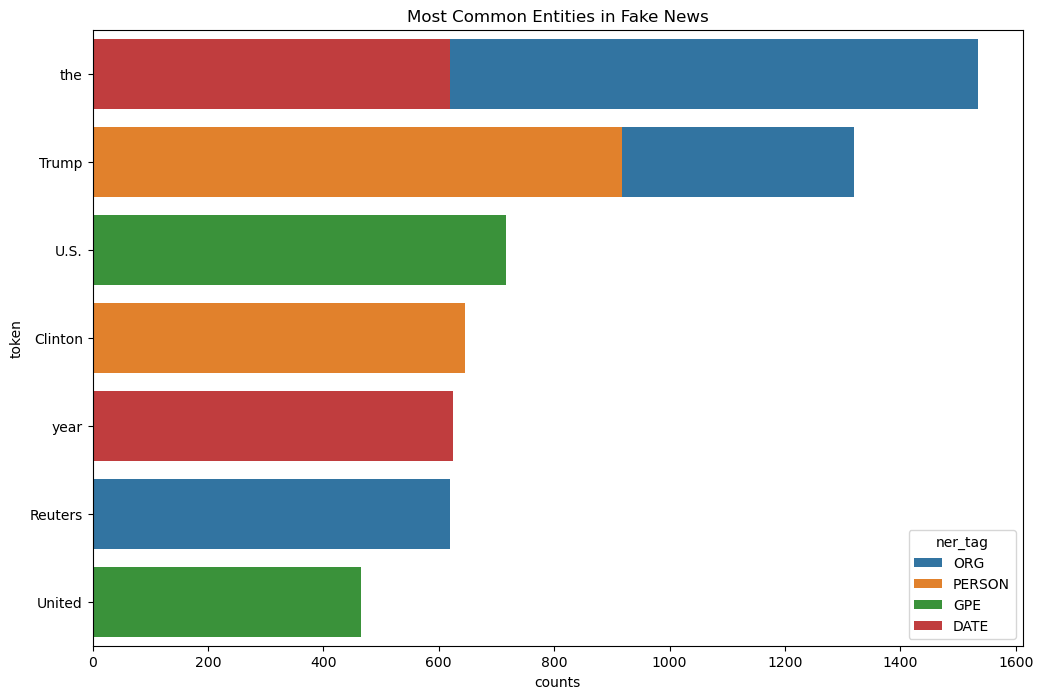

In [37]:
sns.barplot(
    x = 'counts',
    y = 'token',
    hue = 'ner_tag',
    data = top_entities_fake[0:10],
    orient = 'h',
    dodge=False
).set(title='Most Common Entities in Fake News')

[Text(0.5, 1.0, 'Most Common Entities in Factual News')]

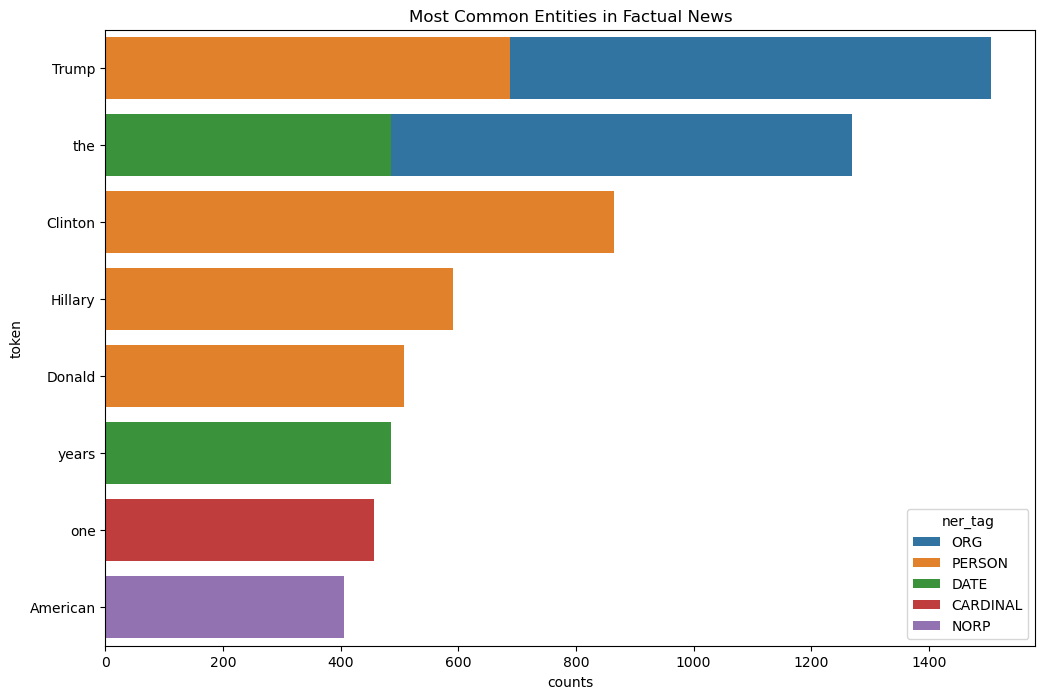

In [38]:
sns.barplot(
    x = 'counts',
    y = 'token',
    hue = 'ner_tag',
    data = top_entities_fact[0:10],
    orient = 'h',
    dodge=False
).set(title='Most Common Entities in Factual News')

#### Text preprocessing

In [39]:
# a lot of the factual news has a location tag at the beginning of the article, let's use regex to remove this
data['text_clean'] = data.apply(lambda x: re.sub(r"^[^-]*-\s*", "", x['text']), axis=1)

In [40]:
# lowercase 
data['text_clean'] = data['text_clean'].str.lower()

In [41]:
# remove punctuation
data['text_clean'] = data.apply(lambda x: re.sub(r"([^\w\s])", "", x['text_clean']), axis=1)

In [42]:
# stop words
en_stopwords = stopwords.words('english')
print(en_stopwords) # check this against our most frequent n-grams

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [43]:
data['text_clean'] = data['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (en_stopwords)]))

In [44]:
# tokenize 
data['text_clean'] = data.apply(lambda x: word_tokenize(x['text_clean']), axis=1)

In [45]:
# stemming
ps = PorterStemmer()
data["text_clean"] = data["text_clean"] \
                  .apply(lambda tokens: \
                  [ps.stem(token) \
                   for token in tokens])

In [46]:
# lemmatize
lemmatizer = WordNetLemmatizer()
data["text_clean"] = data["text_clean"].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

In [47]:
data.head()

,title,text,label,text_clean
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,Factual News,"[as, r, war, nier, go, start, backin, alreadi,..."
1,NaN,Did they post their votes for Hillary already?,Factual News,"[post, vote, hillari, alreadi]"
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",Factual News,"[demonstr, gather, last, night, exercis, const..."
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,Fake News,"[thescen, effort, louisiana, governor, find, p..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",Factual News,"[28, sarmat, missil, dub, satan, 2, replac, ss..."


### Sentiment Analysis

Sentiment Analysis, also known as opinion mining, is a technique used in Natural Language Processing (NLP) to determine the emotional tone or attitude behind a piece of text. It’s the process of automatically identifying whether a writer's opinion is positive, negative, or neutral.

In [48]:
# use vader so we also get a neutral sentiment count
vader_sentiment = SentimentIntensityAnalyzer()

In [49]:
data['vader_sentiment_score'] =  data['text'].apply(lambda x: vader_sentiment.polarity_scores(x)['compound'])

In [50]:
# create labels
bins = [-1, -0.1, 0.1, 1]
names = ['negative', 'neutral', 'positive']

data['vader_sentiment_label'] = pd.cut(data['vader_sentiment_score'],bins, labels=names,right=False)

<Axes: xlabel='vader_sentiment_label'>

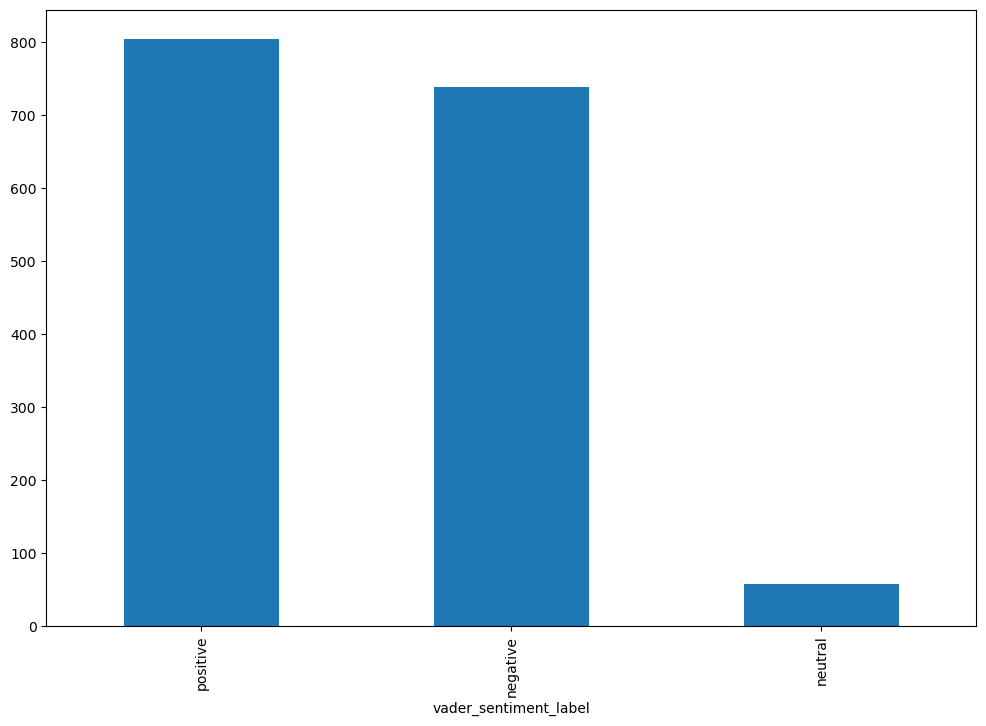

In [51]:
data['vader_sentiment_label'].value_counts().plot.bar()

In [52]:
data[['text', 'vader_sentiment_score', 'vader_sentiment_label']].head()

,text,vader_sentiment_score,vader_sentiment_label
0,No comment is expected from Barack Obama Membe...,-0.9926,negative
1,Did they post their votes for Hillary already?,0.0000,neutral
2,"Now, most of the demonstrators gathered last ...",0.7351,positive
3,A dozen politically active pastors came here f...,0.9993,positive
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",-0.9081,negative


[Text(0.5, 1.0, 'Sentiment by News Type')]

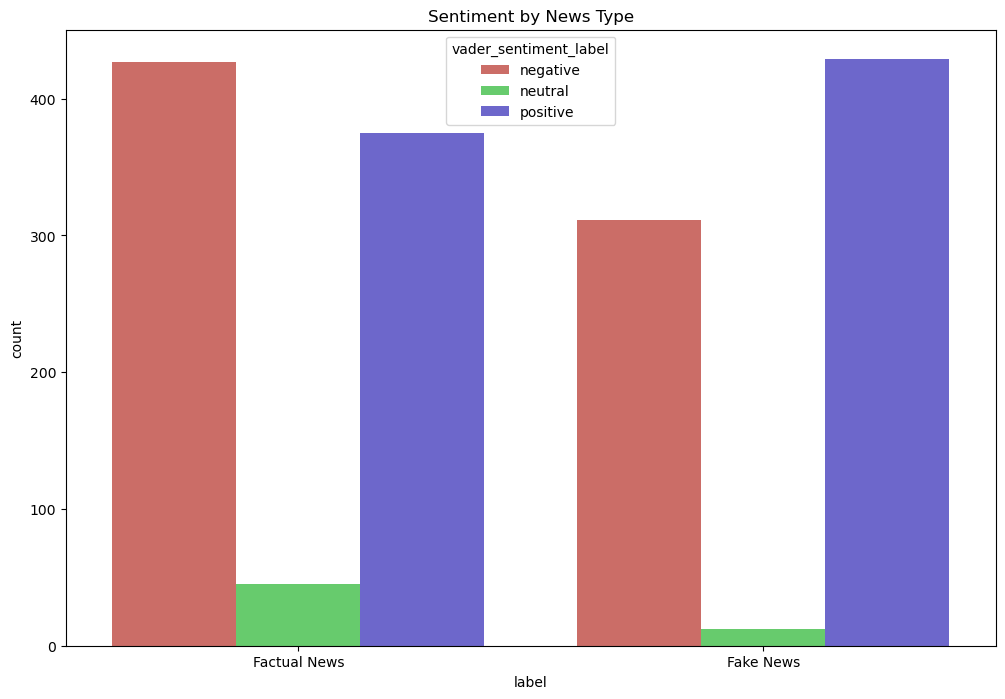

In [53]:
sns.countplot(
    x = 'label',
    hue = 'vader_sentiment_label',
    palette = sns.color_palette("hls",3),
    data = data
) \
.set(title='Sentiment by News Type')

#### LDA

In [54]:
# fake news data vectorization
fake_news_text = data[data['label']== 'Fake News']['text_clean'].reset_index(drop=True)
dictionary_fake = corpora.Dictionary(fake_news_text)
doc_term_fake = [dictionary_fake.doc2bow(text) for text in fake_news_text]

This step filters out the cleaned text of only the fake news articles from the dataset. A dictionary of all unique words in the fake news corpus is then created using gensim.corpora.Dictionary, which maps each word to a unique ID. After that, each fake news article is converted into a bag-of-words representation, capturing the frequency of each word in the dictionary.

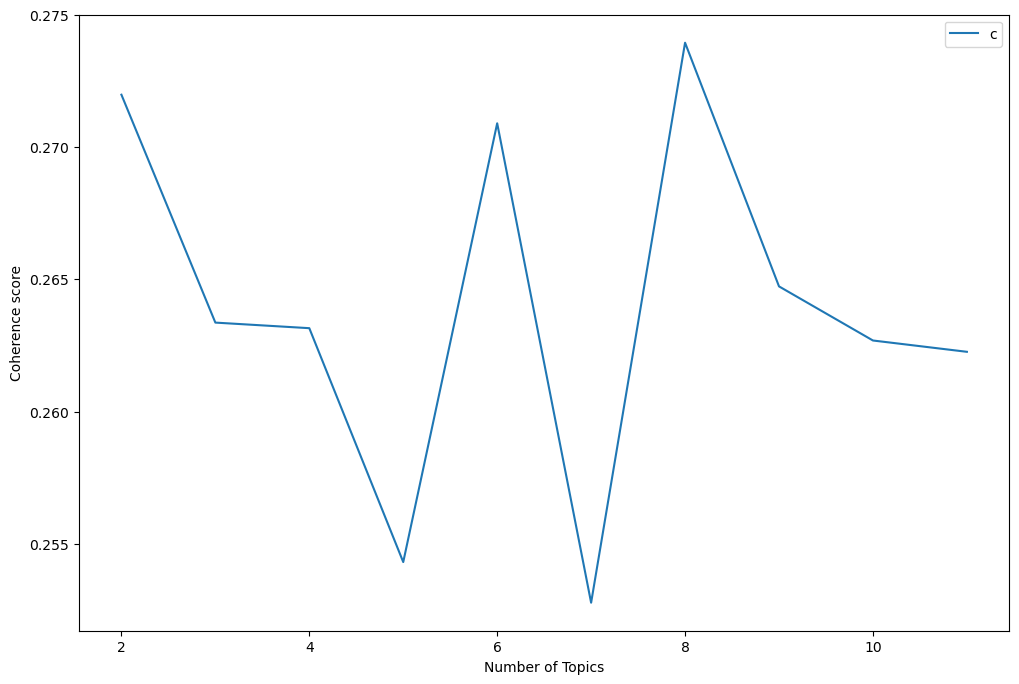

In [55]:
# generate coherence scores to determine an optimum number of topics
coherence_values = []
model_list = []

min_topics = 2
max_topics = 11

for num_topics_i in range(min_topics, max_topics+1):
    model = gensim.models.LdaModel(doc_term_fake, num_topics=num_topics_i, id2word = dictionary_fake)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=fake_news_text, dictionary=dictionary_fake, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())
    
plt.plot(range(min_topics, max_topics+1), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

This step trains multiple LDA (Latent Dirichlet Allocation) models on the fake news corpus, varying the number of topics from 2 to 11. For each model, it calculates the coherence score using the 'c_v' metric, which evaluates how interpretable the topics are based on the actual text. All models and their corresponding coherence scores are stored in lists for further comparison to identify the optimal number of topics.

In [56]:
# create lda model
num_topics_fake = 6

lda_model_fake = gensim.models.LdaModel(corpus=doc_term_fake,
                                       id2word=dictionary_fake,
                                       num_topics=num_topics_fake)

lda_model_fake.print_topics(num_topics=num_topics_fake,num_words=10)

[(0,
  '0.021*"said" + 0.008*"mr" + 0.007*"trump" + 0.006*"would" + 0.005*"state" + 0.005*"year" + 0.005*"new" + 0.005*"u" + 0.004*"time" + 0.003*"presid"'),
 (1,
  '0.015*"said" + 0.009*"mr" + 0.008*"trump" + 0.006*"state" + 0.005*"would" + 0.004*"govern" + 0.004*"parti" + 0.004*"one" + 0.004*"u" + 0.004*"campaign"'),
 (2,
  '0.015*"said" + 0.009*"trump" + 0.007*"mr" + 0.005*"presid" + 0.005*"state" + 0.005*"would" + 0.005*"year" + 0.003*"peopl" + 0.003*"u" + 0.003*"also"'),
 (3,
  '0.016*"said" + 0.010*"trump" + 0.006*"state" + 0.006*"new" + 0.006*"presid" + 0.005*"u" + 0.005*"would" + 0.004*"mr" + 0.004*"peopl" + 0.004*"say"'),
 (4,
  '0.010*"said" + 0.007*"state" + 0.006*"trump" + 0.005*"u" + 0.004*"presid" + 0.004*"peopl" + 0.004*"report" + 0.004*"one" + 0.003*"time" + 0.003*"year"'),
 (5,
  '0.012*"said" + 0.008*"trump" + 0.006*"would" + 0.005*"mr" + 0.005*"u" + 0.004*"state" + 0.003*"presid" + 0.003*"year" + 0.003*"like" + 0.003*"republican"')]

This step builds the final LDA topic model using the previously selected optimal number of topics (in this case, 6) for the fake news corpus. The model is trained using the bag-of-words representation (doc_term_fake) and the word dictionary. Once the model is trained, it displays the top 10 most significant words for each of the 6 topics. These words help interpret the main themes present in the fake news articles.

#### TF-IDF & LSA

TF-IDF (Term Frequency-Inverse Document Frequency) is a technique used to convert text into numerical features by assigning weights to words based on their importance in a document relative to a collection of documents. It highlights words that are frequent in a document but rare across other documents, making them more meaningful for analysis. Latent Semantic Analysis (LSA) builds on TF-IDF by applying Singular Value Decomposition (SVD) to reduce the dimensionality of the TF-IDF matrix. This helps in uncovering hidden topics or patterns in the text by mapping both terms and documents into a lower-dimensional semantic space. LSA is useful for tasks like topic modeling, document similarity, and information retrieval.

In [57]:
def tfidf_corpus(doc_term_matrix):
    # create a corpus using tfidf vecotization
    tfidf = TfidfModel(corpus=doc_term_matrix, normalize=True)
    corpus_tfidf = tfidf[doc_term_matrix]
    return corpus_tfidf

This function applies TF-IDF vectorization to a given document-term matrix (corpus). It uses Gensim’s TfidfModel to transform raw term frequencies into TF-IDF scores, which weigh terms based on their importance across documents. The resulting corpus reflects more meaningful term significance for topic modeling or further analysis.

In [58]:
def get_coherence_scores(corpus, dictionary, text, min_topics, max_topics):
    # generate coherence scores to determine an optimum number of topics
    coherence_values = []
    model_list = []
    for num_topics_i in range(min_topics, max_topics+1):
        model = LsiModel(corpus, num_topics=num_topics_i, id2word = dictionary, random_seed=0)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=text, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    # plot results
    plt.plot(range(min_topics, max_topics+1), coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

This function evaluates multiple LSA (Latent Semantic Analysis) models with different numbers of topics to determine the optimal topic count. For each topic number between min_topics and max_topics, it creates an LSA model and calculates its coherence score using the 'c_v' metric. These scores reflect how interpretable and consistent the topics are with the original texts. The coherence values and models are stored for further comparison.

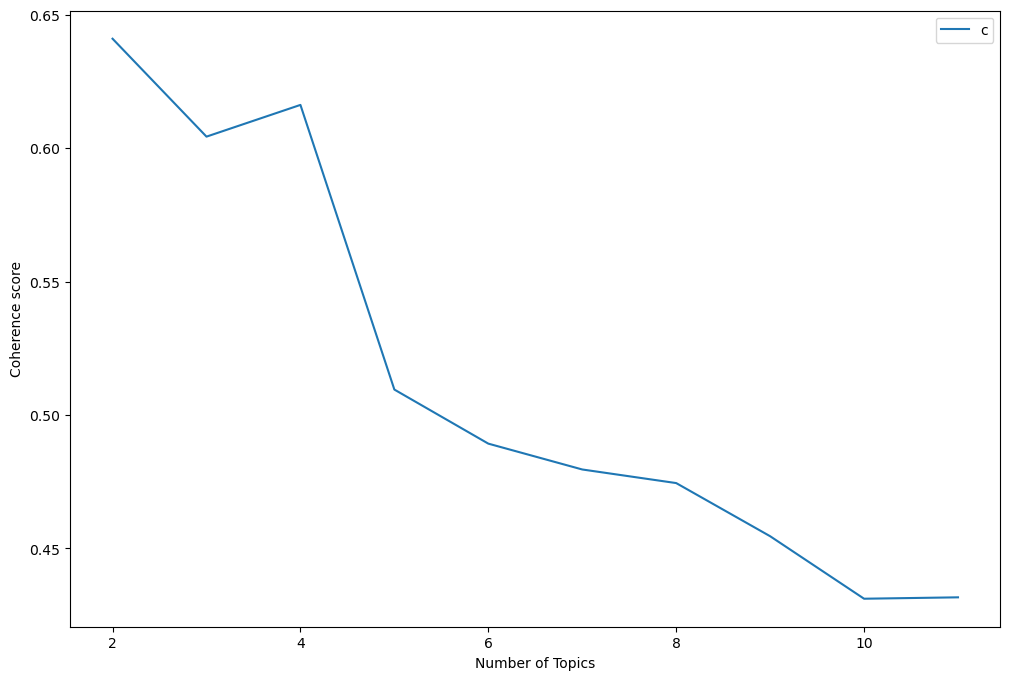

In [59]:
# create tfidf representation
corpus_tfidf_fake = tfidf_corpus(doc_term_fake)
# coherence scores for fake news data
get_coherence_scores(corpus_tfidf_fake, dictionary_fake, fake_news_text, min_topics=2, max_topics=11)

The document-term matrix doc_term_fake is transformed into a TF-IDF weighted corpus using the tfidf_corpus() function. This TF-IDF corpus is then passed to get_coherence_scores() to evaluate topic coherence over a range of topic numbers (from 2 to 11) for the fake news dataset. This helps in identifying the optimal number of topics for LSA modeling.

In [60]:
# model for fake news data
lsa_fake = LsiModel(corpus_tfidf_fake, id2word=dictionary_fake, num_topics=5)
lsa_fake.print_topics()

[(0,
  '-0.224*"trump" + -0.210*"mr" + -0.150*"clinton" + -0.110*"republican" + -0.095*"senat" + -0.094*"obama" + -0.082*"democrat" + -0.077*"campaign" + -0.076*"vote" + -0.076*"u"'),
 (1,
  '0.371*"korea" + -0.239*"clinton" + -0.234*"mr" + 0.234*"north" + 0.221*"nuclear" + 0.202*"missil" + 0.177*"iran" + 0.173*"china" + 0.149*"sanction" + 0.119*"chine"'),
 (2,
  '-0.360*"korea" + -0.242*"clinton" + -0.214*"north" + -0.189*"trump" + -0.161*"china" + -0.137*"missil" + -0.134*"nuclear" + 0.132*"turkey" + 0.125*"iraq" + 0.119*"kurdish"'),
 (3,
  '-0.563*"mr" + -0.193*"clinton" + 0.165*"senat" + 0.138*"insur" + 0.138*"obamacar" + 0.131*"bill" + 0.131*"republican" + 0.121*"tax" + 0.118*"health" + 0.105*"repeal"'),
 (4,
  '0.378*"mr" + -0.290*"clinton" + -0.214*"russian" + -0.174*"email" + -0.171*"russia" + -0.149*"comey" + 0.137*"tax" + -0.123*"putin" + -0.112*"fbi" + 0.103*"korea"')]

An LSA model is created using the TF-IDF-weighted corpus of fake news and a fixed number of topics (5). The print_topics() method displays the most representative terms for each topic, helping interpret what each topic represents semantically.

#### Predict fake or factual data

In [61]:
data.head()

,title,text,label,text_clean,vader_sentiment_score,vader_sentiment_label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,Factual News,"[as, r, war, nier, go, start, backin, alreadi,...",-0.9926,negative
1,NaN,Did they post their votes for Hillary already?,Factual News,"[post, vote, hillari, alreadi]",0.0000,neutral
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",Factual News,"[demonstr, gather, last, night, exercis, const...",0.7351,positive
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,Fake News,"[thescen, effort, louisiana, governor, find, p...",0.9993,positive
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",Factual News,"[28, sarmat, missil, dub, satan, 2, replac, ss...",-0.9081,negative


In [62]:
X = [','.join(map(str,l)) for l in data['text_clean']]
Y = data['label']

In [63]:
# text vectorization - CountVectorizer
countvec =  CountVectorizer()
countvec_fit = countvec.fit_transform(X)
bag_of_words =  pd.DataFrame(countvec_fit.toarray(),columns=countvec.get_feature_names_out())

In [64]:
# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, Y, test_size=0.3)

#### Logistic Regression

In [65]:
lr = LogisticRegression(random_state=0).fit(X_train,y_train)

In [66]:
y_pred_lr = lr.predict(X_test)

In [67]:
accuracy_score(y_pred_lr,y_test)

0.8520833333333333

In [68]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

Factual News       0.85      0.87      0.86       252
   Fake News       0.86      0.83      0.84       228

    accuracy                           0.85       480
   macro avg       0.85      0.85      0.85       480
weighted avg       0.85      0.85      0.85       480



#### SVM

In [69]:
svm = SGDClassifier().fit(X_train,y_train)

In [70]:
y_pred_svm = svm.predict(X_test)

In [71]:
accuracy_score(y_pred_svm,y_test)

0.8583333333333333

In [72]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

Factual News       0.87      0.86      0.86       252
   Fake News       0.85      0.86      0.85       228

    accuracy                           0.86       480
   macro avg       0.86      0.86      0.86       480
weighted avg       0.86      0.86      0.86       480



#### Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf = RandomForestClassifier().fit(X_train,y_train)

In [75]:
y_pred_rf = rf.predict(X_test)

In [76]:
accuracy_score(y_pred_rf,y_test)

0.8354166666666667

In [77]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

Factual News       0.88      0.79      0.84       252
   Fake News       0.79      0.88      0.84       228

    accuracy                           0.84       480
   macro avg       0.84      0.84      0.84       480
weighted avg       0.84      0.84      0.84       480



#### Naive Bayes

In [78]:
from sklearn.naive_bayes import MultinomialNB

In [79]:
mnb = MultinomialNB().fit(X_train,y_train)

In [80]:
y_pred_mnb = mnb.predict(X_test)

In [81]:
accuracy_score(y_pred_mnb,y_test)

0.8395833333333333

#### XGBClassifier

In [82]:
from xgboost import XGBClassifier

In [83]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])
Y = data['label_encoded']
# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, Y, test_size=0.3)

In [84]:
xgb = XGBClassifier().fit(X_train,y_train)

In [85]:
y_pred_xgb = xgb.predict(X_test)

In [86]:
accuracy_score(y_pred_xgb,y_test)

0.8770833333333333

## Conclusion

In this project, we built a machine learning pipeline to classify news articles as Fake or Real using natural language processing (NLP) techniques. The preprocessing steps included lemmatization, stopword removal, and TF-IDF vectorization to convert raw text into meaningful features.

We evaluated multiple machine learning models including Logistic Regression, Naive Bayes, SVM, Random Forest, and XGBoost. Among them, XGBoost and Random Forest showed the highest accuracy and F1-score, highlighting their effectiveness for text classification tasks.

To further improve the model, we performed hyperparameter tuning using GridSearchCV and applied SHAP for explainability, helping us interpret how different features contributed to the predictions.

This project demonstrates the application of NLP, model comparison, interpretability tools, and end-to-end machine learning pipeline construction — making it a strong portfolio project for data science and AI roles.

Accuracy of models:

Logistic Regression : 0.8520833333333333
SVM                 : 0.8583333333333333
Random Forest       : 0.8354166666666667
Naive Bayes         : 0.8395833333333333
XGBClassifier       : 0.8770833333333333